importing the required libreries 

In [15]:
import numpy as np
import tensorflow as tf
# import scipy
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

loading and getting the dataset

In [17]:
# Load the training dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    './new_data_set/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    './new_data_set/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 26640 files belonging to 36 classes.
Found 1751 files belonging to 36 classes.


In [18]:
# Advanced model

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(64,64,3))


# Add convolutional layers
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(input_layer)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
x = tf.keras.layers.Dropout(0.5)(x)


# Flatten the output of the convolutional layers
x = tf.keras.layers.Flatten()(x)


# Add dense layers
x = tf.keras.layers.Dense(units=512, activation='relu')(x)
x = tf.keras.layers.Dense(units=256, activation='relu')(x)


# Add dropout layer to avoid overfitting
x = tf.keras.layers.Dropout(0.5)(x)


# Add output layer
output_layer = tf.keras.layers.Dense(units=36, activation='softmax')(x)


# Create the model
cnn = tf.keras.Model(inputs=input_layer, outputs=output_layer)


# Compile the model
cnn.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [19]:
# Print the model summary
cnn.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [21]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 405s 480ms/step - accuracy: 0.1978 - loss: 6.9099 - val_accuracy: 0.5534 - val_loss: 2.0271
Epoch 2/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 371s 442ms/step - accuracy: 0.4032 - loss: 2.0994 - val_accuracy: 0.6385 - val_loss: 1.4899
Epoch 3/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 365s 435ms/step - accuracy: 0.4798 - loss: 1.8074 - val_accuracy: 0.6899 - val_loss: 1.3217
Epoch 4/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 380s 452ms/step - accuracy: 0.5464 - loss: 1.5718 - val_accuracy: 0.6962 - val_loss: 1.1130
Epoch 5/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 334s 398ms/step - accuracy: 0.5845 - loss: 1.4273 - val_accuracy: 0.7293 - val_loss: 0.9563


In [22]:
cnn.save('new_model_4.h5')

In [23]:
training_history.history #return dictionary of history

{'accuracy': [0.282282292842865,
  0.4277402460575104,
  0.5026651620864868,
  0.5608108043670654,
  0.5997747778892517],
 'loss': [3.256636142730713,
  2.0046257972717285,
  1.7340549230575562,
  1.5231109857559204,
  1.3780819177627563],
 'val_accuracy': [0.553398072719574,
  0.6384922862052917,
  0.689891517162323,
  0.6961736083030701,
  0.7292975187301636],
 'val_loss': [2.0270650386810303,
  1.4898509979248047,
  1.3216986656188965,
  1.113040566444397,
  0.956294596195221]}

In [24]:
#recording history
import json
with open('training_history_model_4.json','w') as f:
  json.dump(training_history.history,f)
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [25]:
print("validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set accuracy: 72.92975187301636 %


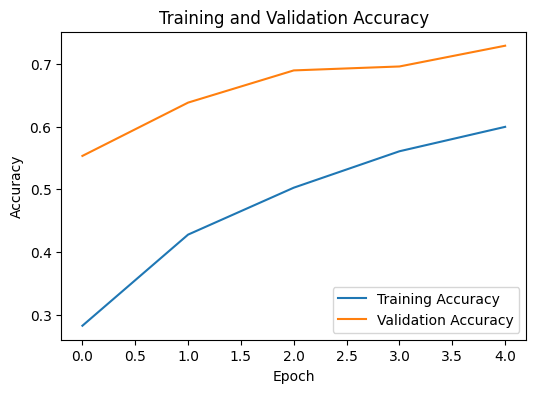

In [26]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy and loss history
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


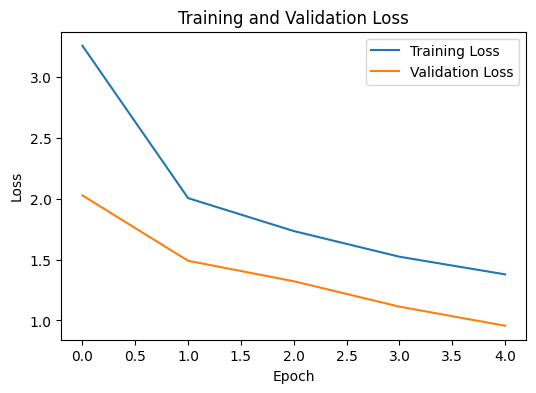

In [27]:
# Plot the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()